In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
ds=xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds_region=ds.sel(lat=slice(-5,5),lon=slice(190,240))
ds_region

<xarray.Dataset>
Dimensions:  (lat: 5, lon: 26, time: 684)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [57]:
#1.1
arr_region=ds_region.sst.groupby('time.month')
time=pd.date_range(start='1960-01',periods=684,freq='m')

In [58]:
sst_mean = ds_region.sst.groupby(ds_region.sst.time.dt.month).mean()
sst_mean

<xarray.DataArray 'sst' (month: 12, lat: 5, lon: 26)>
array([[[28.603327, 28.46709 , 28.329628, ..., 25.547432, 25.407318,
         25.278002],
        [28.066399, 27.915398, 27.768072, ..., 25.050482, 24.91376 ,
         24.782074],
        [27.704035, 27.550066, 27.402925, ..., 24.939613, 24.821255,
         24.694103],
        [27.733974, 27.594133, 27.458607, ..., 25.548328, 25.472971,
         25.376846],
        [27.979864, 27.871954, 27.765362, ..., 26.36988 , 26.3484  ,
         26.305618]],

       [[28.540337, 28.406334, 28.285015, ..., 26.240774, 26.166866,
         26.114462],
        [27.93303 , 27.779905, 27.645334, ..., 25.759432, 25.692144,
         25.656687],
        [27.53061 , 27.37174 , 27.229572, ..., 25.599237, 25.549782,
         25.52225 ],
        [27.580507, 27.433657, 27.294996, ..., 26.10608 , 26.09529 ,
         26.081562],
        [27.879517, 27.76656 , 27.654293, ..., 26.763283, 26.789177,
...
         24.778183],
        [28.425577, 28.266651, 28.103579, ..., 24.558685, 24.39087 ,
         24.227642],
        [28.132467, 27.965519, 27.80641 , ..., 24.439455, 24.283432,
         24.136156],
        [28.2473  , 28.10055 , 27.961477, ..., 25.181112, 25.047338,
         24.929998],
        [28.58302 , 28.475353, 28.364399, ..., 26.244923, 26.143816,
         26.065308]],

       [[28.796284, 28.663803, 28.517038, ..., 25.248241, 25.07334 ,
         24.901867],
        [28.310251, 28.154438, 27.991566, ..., 24.703024, 24.541676,
         24.376198],
        [27.975597, 27.812155, 27.65246 , ..., 24.582592, 24.43548 ,
         24.279617],
        [28.0253  , 27.881811, 27.743273, ..., 25.26573 , 25.148493,
         25.024502],
        [28.281471, 28.174547, 28.068707, ..., 26.240398, 26.173206,
         26.10181 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

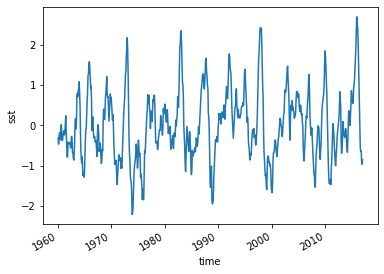

In [64]:
sst_anom=arr_region-sst_mean
sst_anom_mean = np.mean(sst_anom,axis=(1,2))
sst_anom_mean.plot()

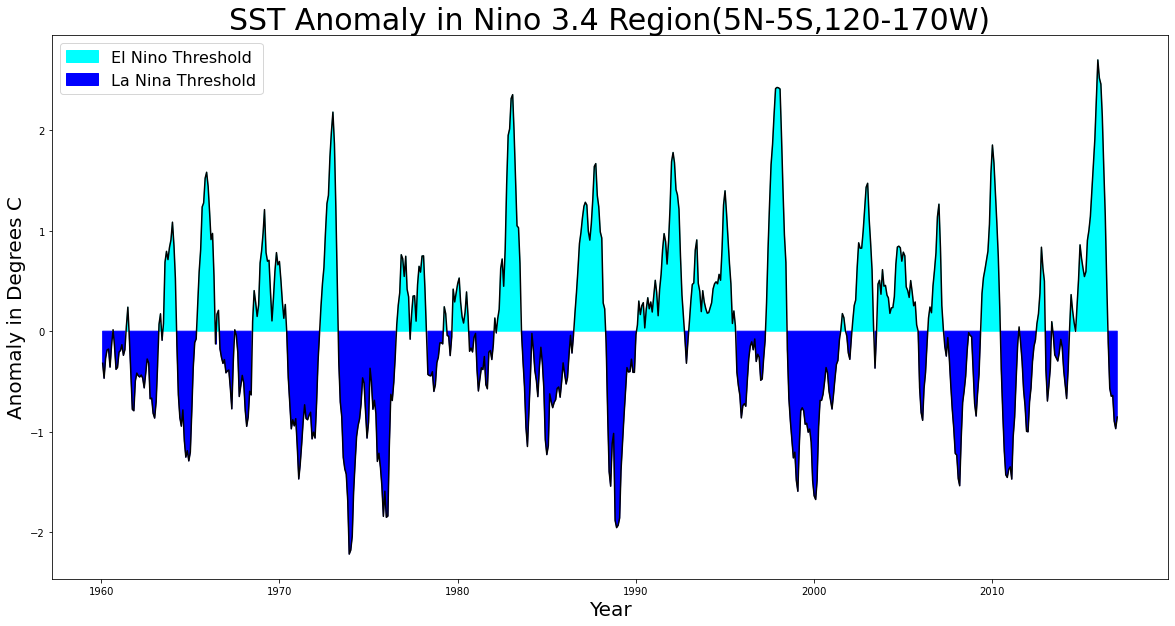

In [78]:
# set time serious
time = pd.date_range(start='1960-01',periods=684,freq='m')
fig,ax = plt.subplots(1,1,sharex=True,figsize=(20,10))
ax.plot(time,sst_anom_mean,color='k')
# set xlabel, ylabel and title
ax.set_ylabel('Anomaly in Degrees C', color='k', fontsize=20)
ax.set_xlabel('Year', color='k', fontsize=20)
ax.set_title("SST Anomaly in Nino 3.4 Region(5N-5S,120-170W)", fontsize=30)
p1=ax.fill_between(time,0,sst_anom_mean,where=(sst_anom_mean>0),color='cyan')
p2=ax.fill_between(time,0,sst_anom_mean,where=(sst_anom_mean<0),color='b')
ax.legend([p1,p2],['El Nino Threshold','La Nina Threshold'],fontsize=16)